In [1]:
%pip install prophet

  Using cached prophet-1.1.5-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached holidays-0.44-py3-none-any.whl.metadata (22 kB)
  Using cached stanio-0.3.0-py3-none-any.whl.metadata (963 bytes)
Using cached prophet-1.1.5-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.1-py3-none-any.whl (93 kB)
Using cached holidays-0.44-py3-none-any.whl (922 kB)
Using cached stanio-0.3.0-py3-none-any.whl (6.2 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
from prophet import Prophet
import pandas as pd

In [7]:
df1 = pd.read_csv("../dataset/layoffs_data.csv")

In [8]:
total_laid_off_count = df1.groupby('Date')['Laid_Off_Count'].sum().reset_index()
total_laid_off_count

,Date,Laid_Off_Count
0,2020-03-11,75.0
1,2020-03-12,20.0
2,2020-03-13,14.0
3,2020-03-16,146.0
4,2020-03-18,4.0
...,...,...
757,2024-02-23,133.0
758,2024-02-26,1570.0
759,2024-02-27,1329.0
760,2024-02-28,1030.0


In [9]:
total_laid_off_count.columns=['ds','y']
total_laid_off_count ['ds']=pd.to_datetime(total_laid_off_count['ds'])

In [10]:
sample_data = total_laid_off_count.tail(120)
sample_data

,ds,y
642,2023-09-17,350.0
643,2023-09-18,0.0
644,2023-09-20,0.0
645,2023-09-21,230.0
646,2023-09-22,105.0
...,...,...
757,2024-02-23,133.0
758,2024-02-26,1570.0
759,2024-02-27,1329.0
760,2024-02-28,1030.0


In [11]:
m=Prophet(interval_width=0.95)
m.fit(sample_data)
future=m.make_future_dataframe(periods=20)
future.tail(20)

15:31:19 - cmdstanpy - INFO - Chain [1] start processing
15:31:20 - cmdstanpy - INFO - Chain [1] done processing


,ds
120,2024-03-01
121,2024-03-02
122,2024-03-03
123,2024-03-04
124,2024-03-05
125,2024-03-06
126,2024-03-07
127,2024-03-08
128,2024-03-09
129,2024-03-10


In [12]:
forecast = m.predict(future)
forecast.tail(20)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
135,2024-03-16,644.651935,-1749.601279,2903.193242
136,2024-03-17,873.338992,-1475.423515,3295.060837
137,2024-03-18,1543.482429,-783.694585,4096.235784
138,2024-03-19,1550.413108,-953.738199,3757.787799
139,2024-03-20,1430.256809,-808.647169,3655.137975


c:\Users\670310840\Downloads\Documents\GitHub\Layoffs\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\670310840\Downloads\Documents\GitHub\Layoffs\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


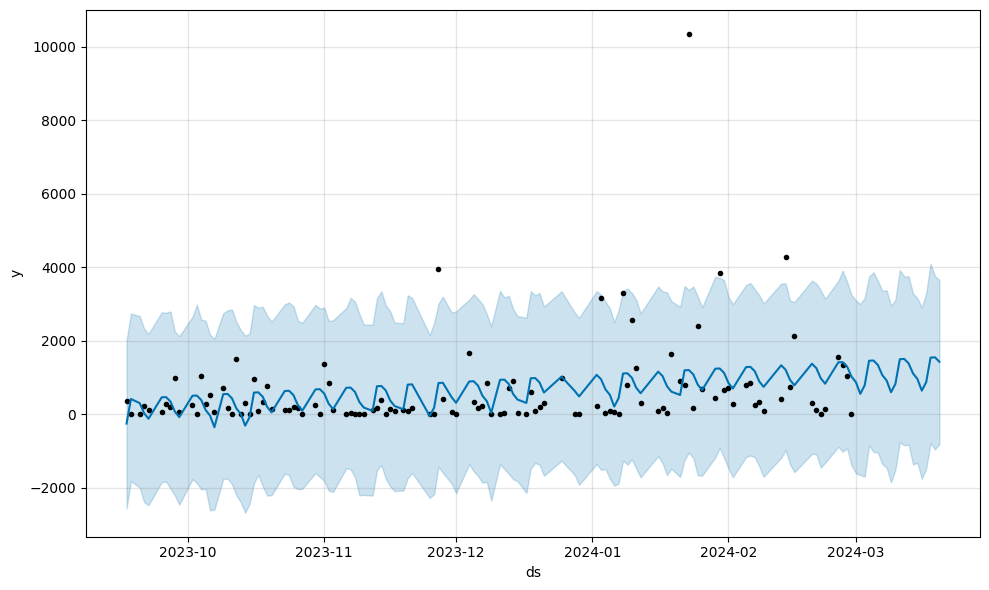

In [13]:
Predicted_layoffs_count = m.plot(forecast)

c:\Users\670310840\Downloads\Documents\GitHub\Layoffs\.venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


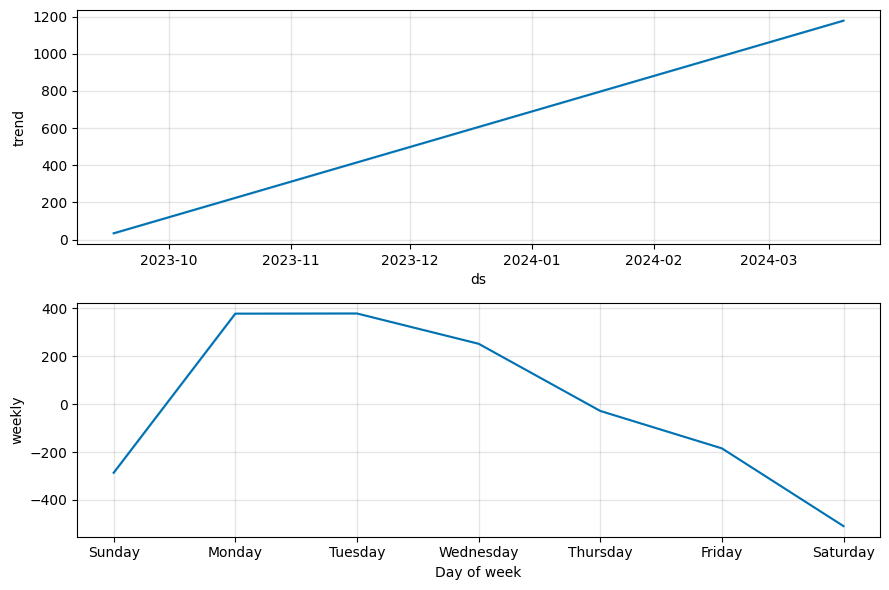

In [14]:
confirmed_forecast_plot1 = m.plot_components(forecast)